### Loading Data

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
df_path = "data/training_data.csv"
npz_dir = "data/npz_data"

In [3]:
#load csv
df=pd.read_csv(df_path)
df.head()

,id,mz_low,mz_high,name,root_region_intensity,spec_id
0,0,87.0007,87.0157,Pyruvic acid,3749.830566,bf72760c-90ab-453a-9856-dfcf4b194ede
1,1,88.0328,88.0478,L-Alanine,3823.749268,fd1cb85c-f81f-4f49-9e1d-31d0780280d5
2,2,89.0164,89.0314,Lactic acid,899.031799,4dfcaf92-1b9a-4da1-97ed-4239a0c92886
3,4,104.0277,104.0427,Serine,542.101440,651b5858-92cc-4b62-ae1c-82075d923108
4,5,108.0049,108.0199,Hypotaurine,191.645645,e9bdd8c2-7c89-4f3c-bf41-f0c658d7f3fe


In [4]:
# loading npz 
spec_id=df.loc[0,'spec_id']
npz_path=os.path.join(npz_dir,f"{spec_id}.npz")

with np.load(npz_path) as npz:
    mz = npz['mz']
    intensities = npz['intensities']

print("\nFirst Spec ID:", spec_id)
print("m/z shape:", mz.shape)
print("Intensity shape:", intensities.shape)
print("\nSample m/z values:", mz[:10])
print("Sample intensities:", intensities[:10])


First Spec ID: bf72760c-90ab-453a-9856-dfcf4b194ede
m/z shape: (80,)
Intensity shape: (80,)

Sample m/z values: [86.99064875 86.9910837  86.99151866 86.99195361 86.99238857 86.99282354
 86.9932585  86.99369347 86.99412844 86.99456341]
Sample intensities: [4.8089743 8.8732    5.7162895 7.9441743 5.0840626 6.9757705 5.213771
 9.002102  4.0344863 9.366201 ]


### Visualizations

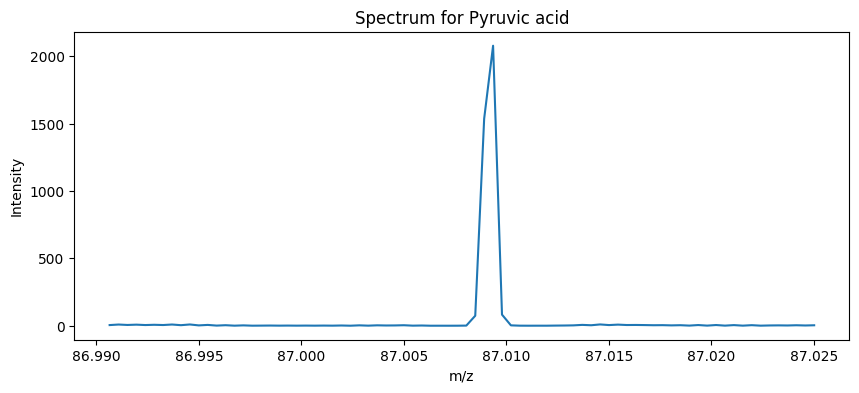

In [5]:
import matplotlib.pyplot as plt

compound = df.loc[0]["name"]

plt.figure(figsize=(10, 4))
plt.plot(mz, intensities)
plt.title(f"Spectrum for {compound}")
plt.xlabel("m/z")
plt.ylabel("Intensity")
plt.show()

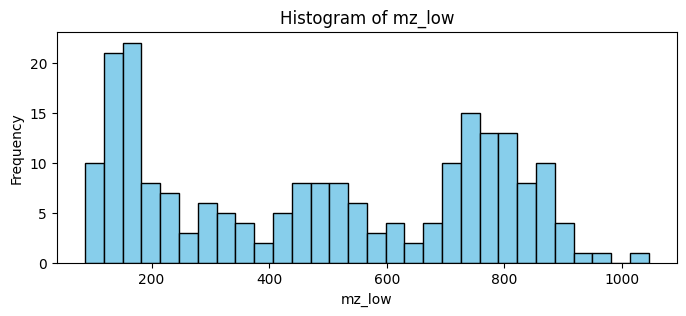

In [6]:
# Plot histogram of mz_low
plt.figure(figsize=(8, 3))
plt.hist(df["mz_low"], bins=30, color="skyblue", edgecolor="black")
plt.title("Histogram of mz_low")
plt.xlabel("mz_low")
plt.ylabel("Frequency")
plt.show()

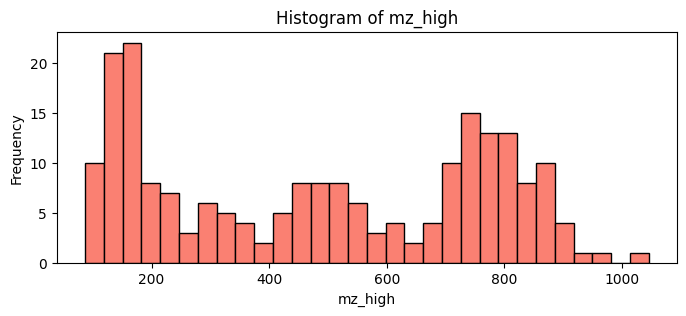

In [7]:
# Plot histogram of mz_high
plt.figure(figsize=(8, 3))
plt.hist(df["mz_high"], bins=30, color="salmon", edgecolor="black")
plt.title("Histogram of mz_high")
plt.xlabel("mz_high")
plt.ylabel("Frequency")
plt.show()

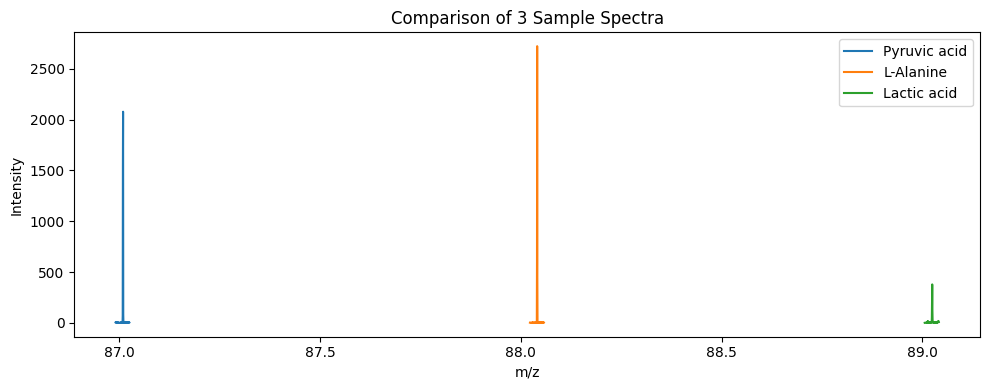

In [8]:
with np.load(npz_path) as data:
    mz=data['mz']
    intensities = data['intensities']

plt.figure(figsize=(10, 4))
for _, row in df.head(3).iterrows():
    spec_id = row["spec_id"]
    name = row["name"]
    npz_path = os.path.join(npz_dir, f"{spec_id}.npz")
    with np.load(npz_path) as data:
        mz = data["mz"]
        intensities = data["intensities"]
    plt.plot(mz, intensities, label=name)


plt.title("Comparison of 3 Sample Spectra")
plt.xlabel("m/z")
plt.ylabel("Intensity")
plt.legend()
plt.tight_layout()
plt.show()

<Axes: >

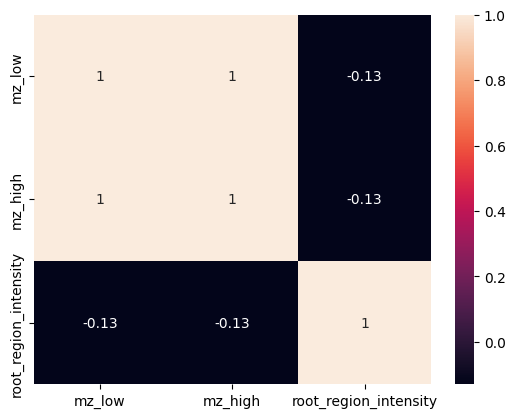

In [9]:
import seaborn as sns
sns.heatmap(df[['mz_low','mz_high','root_region_intensity']].corr(),annot=True)

In [10]:
num_df=df.select_dtypes(include=["number"])
num_df=num_df.drop(columns=['id'])
num_df.corr()

,mz_low,mz_high,root_region_intensity
mz_low,1.000000,1.000000,-0.128832
mz_high,1.000000,1.000000,-0.128831
root_region_intensity,-0.128832,-0.128831,1.000000


### Handling Missing values


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     212 non-null    int64  
 1   mz_low                 212 non-null    float64
 2   mz_high                212 non-null    float64
 3   name                   212 non-null    object 
 4   root_region_intensity  212 non-null    float64
 5   spec_id                212 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.1+ KB


In [12]:
df.isnull()

,id,mz_low,mz_high,name,root_region_intensity,spec_id
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
207,False,False,False,False,False,False
208,False,False,False,False,False,False
209,False,False,False,False,False,False
210,False,False,False,False,False,False


In [13]:
df.isnull().sum()

id                       0
mz_low                   0
mz_high                  0
name                     0
root_region_intensity    0
spec_id                  0
dtype: int64

In [14]:
import json
mz_min = df[['mz_low', 'mz_high']].min().min()
mz_max = df[['mz_low', 'mz_high']].max().max()

df['mz_low_norm'] = (df['mz_low'] - mz_min) / (mz_max - mz_min)
df['mz_high_norm'] = (df['mz_high'] - mz_min) / (mz_max - mz_min)

# Save normalization range for later inverse transformation
with open("norm_params.json", "w") as f:
    json.dump({'mz_min': float(mz_min), 'mz_max': float(mz_max)}, f)

# Containers for features and labels
X = []  # shape: (n_samples, 80, 2)
y = []  # shape: (n_samples, 2)

# Loop through each spectrum
for _, row in df.iterrows():
    spec_id = row['spec_id']
    npz_path = os.path.join(npz_dir, f"{spec_id}.npz")
    
    if not os.path.exists(npz_path):
        continue

    with np.load(npz_path) as data:
        mz = data['mz']
        intensities = data['intensities']

    # Normalize intensities to [0, 1]
    norm_intensities = intensities / (np.max(intensities) + 1e-8)

    # Stack mz and intensity to shape (80, 2)
    spectrum = np.stack([mz, norm_intensities], axis=1)
    X.append(spectrum.astype(np.float32))

    # Normalized targets
    y.append([
        row['mz_low_norm'],
        row['mz_high_norm']
    ])

# Convert to arrays
X = np.array(X)  # shape: (N, 80, 2)
y = np.array(y)  # shape: (N, 2)

# Save for modeling
np.save("X.npy", X)
np.save("y.npy", y)

### Lasso and Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your preprocessed data
X = np.load("X.npy")      # shape: (212, 80, 2)
y = np.load("y.npy")      # shape: (212, 2)

# Flatten X to (N, 160) for ML models
X_flat = X.reshape(X.shape[0], -1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Initialize models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)  # You can tune alpha

# Train
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Predict
ridge_preds = ridge.predict(X_test)
lasso_preds = lasso.predict(X_test)

# Evaluate
def print_scores(name, y_test, y_pred):
    print(f"--- {name} ---")
    print("MSE :", mean_squared_error(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))  # Between -∞ and 1
    print()

In [20]:
print_scores("Ridge", y_test, ridge_preds)
print_scores("Lasso", y_test, lasso_preds)

--- Ridge ---
MSE : 7.629184686775043e-12
MAE : 2.044677819337863e-06
R² Score: 0.9999999999027268

--- Lasso ---
MSE : 1.2275959233581562e-09
MAE : 3.136816886417091e-05
R² Score: 0.9999999843479174



In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
rf_preds = rf.predict(X_test)

print_scores("Random Forest", y_test, rf_preds)

--- Random Forest ---
MSE : 1.2516733956727453e-05
MAE : 0.002513755111462615
R² Score: 0.9998404092252664

